### Plots associated with HF Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.rcParams.update({
    "pgf.texsystem": "xelatex",
    "font.family": "serif",      
    "text.usetex": True,          
    "pgf.rcfonts": False,         
    'font.size': 18,         
    'axes.titlesize': 18,    
    'axes.labelsize': 18,    
    'xtick.labelsize': 16,    
    'ytick.labelsize': 16,    
    'legend.fontsize': 16,   
})

<Figure size 1000x600 with 0 Axes>

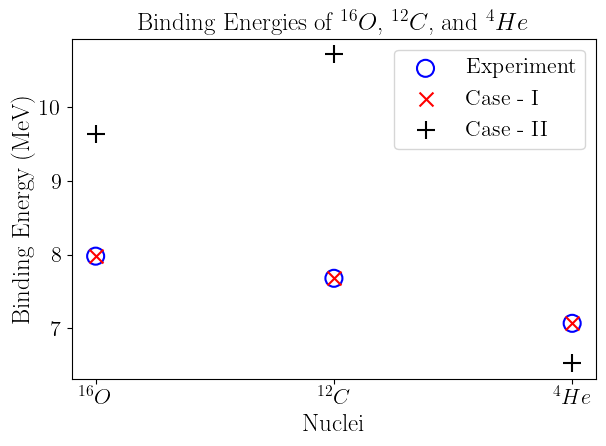

In [2]:
# This is plot for figure 1 in our paper
# Data
A = [7.9800, 7.6800, 7.0700]
B = [7.9800, 7.6800, 7.0700]
C = [9.6343, 10.7180, 6.5266]

elements = ['$^{16} O$', '$^{12}C$', '$^{4}He$']

#plots of different binding enrgies
plt.scatter(elements, A, label='Experiment', marker='o', facecolors='none', edgecolors='blue', s=150, linewidths=1.5)
plt.scatter(elements, B, label='Case - I', marker='x', color='red', s=100, linewidths=1.5)
plt.scatter(elements, C, label='Case - II', marker='+', color='black', s=150, linewidths=1.5)

#labels and title
plt.xlabel('Nuclei')
plt.ylabel('Binding Energy (MeV)')
plt.title('Binding Energies of $^{16} O$, $^{12}C$, and $^{4}He$')
plt.legend()
plt.tight_layout()

plt.savefig('binding_energies.pdf', format='pdf')
plt.show()


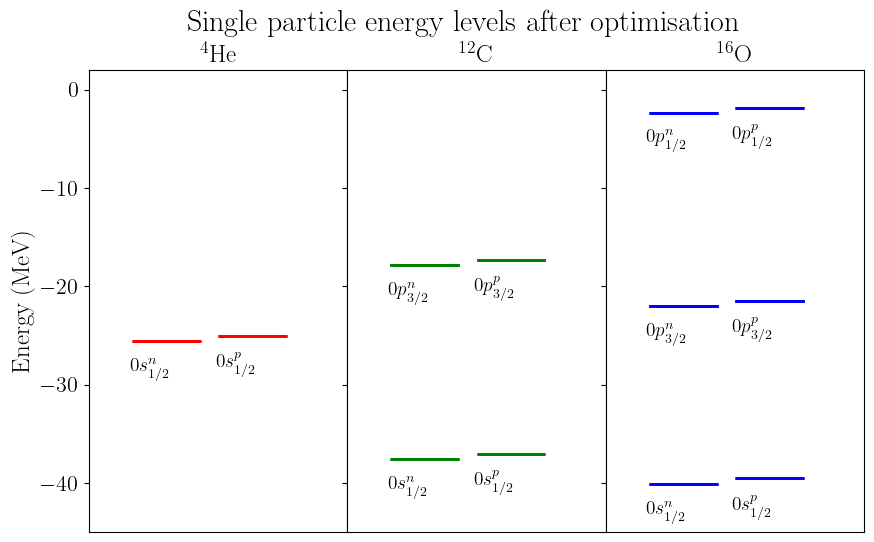

In [3]:
#Plot of figure 2 in our paper
# Original levels
first_column_array = np.array([
    '[0s1/2 n]', '[0s1/2 n]', '[0s1/2 p]', '[0s1/2 p]', '[0p3/2 n]',
    '[0p3/2 n]', '[0p3/2 n]', '[0p3/2 n]', '[0p3/2 p]', '[0p3/2 p]',
    '[0p3/2 p]', '[0p3/2 p]', '[0p1/2 n]', '[0p1/2 n]', '[0p1/2 p]',
    '[0p1/2 p]'
], dtype=object)


def convert_to_latex(level):
    level = level.strip("[]")  
    parts = level.split(" ")  # Split into components
    if len(parts) == 2:
        orbital, particle = parts
        main_part, subscript = orbital[:-3], orbital[-3:]  # Extract main part and subscript
        return rf"{main_part}_{{{subscript}}}^{{{particle}}}"
    return level

latex_labels = np.array([convert_to_latex(level) for level in first_column_array])

# Energy values
energies_o = [-40.0947, -40.0947, -39.5553, -39.5553, -21.9999, -21.9999, 
              -21.9999, -21.9999, -21.4801, -21.4801, -21.4801, -21.4801, 
              -2.3432, -2.3432, -1.8268, -1.8268] # Energy values of Oxygen

energies_he = [-25.5897, -25.5897, -25.0503, -25.0503] # Energy values of Helium

energies_c = [-37.6047, -37.6047, -37.0653, -37.0653, -17.8499, -17.8499,
              -17.8499, -17.8499, -17.3301, -17.3301, -17.3301, -17.3301] # Energy values of carbon

def plot_energy_levels(ax, energies, labels, x_offset, title, color):
    unique_energies = sorted(set(energies), reverse=True)
    label_offsets = {}
    added_labels = {}

    for energy in unique_energies:
        indices = [i for i, e in enumerate(energies) if abs(e - energy) < 0.1]
        current_labels = [labels[i] for i in indices]

        # Directly plot without energy shifting
        for i, label in enumerate(current_labels):
            # No vertical offset applied here
            ax.hlines(y=energy, xmin=x_offset, xmax=x_offset + 0.8, color=color, linestyle='-', linewidth=2)

            # Position label below the line (move down and right)
            if label not in added_labels.get(energy, []):
                offset = label_offsets.get(energy, 0)
                ax.text(
                    x_offset + offset * 0.4 + 0.2,
                    energy - 3,
                    rf"${label}$",
                    verticalalignment='center',
                    horizontalalignment='center',
                    fontsize=14,  # Increased font size
                )
                label_offsets[energy] = offset + 1
                added_labels.setdefault(energy, []).append(label)

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_xlim(-0.5, 2.5)

fig, axes = plt.subplots(1, 3, figsize=(10, 6), sharey=True)

data = [
    (energies_he, "^{4}He", 'red'),
    (energies_c, "^{12}C", 'green'),
    (energies_o, "^{16}O", 'blue')
]

for ax, (energies, title, color) in zip(axes, data):
    n_energies = [e for e, l in zip(energies, first_column_array) if 'n]' in l]
    n_labels = [convert_to_latex(l) for l in first_column_array if 'n]' in l]
    p_energies = [e for e, l in zip(energies, first_column_array) if 'p]' in l]
    p_labels = [convert_to_latex(l) for l in first_column_array if 'p]' in l]

    # Neutron levels on the left
    plot_energy_levels(ax, n_energies, n_labels, x_offset=0, title='', color=color)

    # Nroton levels on the right
    plot_energy_levels(ax, p_energies, p_labels, x_offset=1, title='', color=color)

    ax.set_title(rf'$\mathrm{{{title}}}$')

axes[0].set_ylim([-45, 2])
axes[0].set_ylabel('Energy (MeV)')
plt.suptitle('Single particle energy levels after optimisation')
plt.subplots_adjust(wspace=0)
plt.savefig('optimizedenergy_levels.pdf')
plt.show()


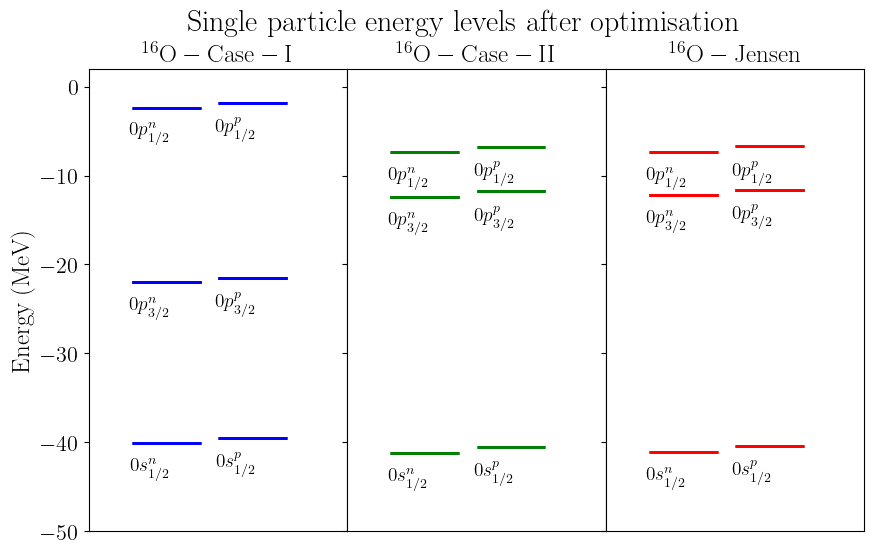

In [4]:
#Plot for figure 3 in our paper
# Original levels
first_column_array = np.array([
    '[0s1/2 n]', '[0s1/2 n]', '[0s1/2 p]', '[0s1/2 p]', '[0p3/2 n]',
    '[0p3/2 n]', '[0p3/2 n]', '[0p3/2 n]', '[0p3/2 p]', '[0p3/2 p]',
    '[0p3/2 p]', '[0p3/2 p]', '[0p1/2 n]', '[0p1/2 n]', '[0p1/2 p]',
    '[0p1/2 p]'
], dtype=object)


latex_labels = np.array([convert_to_latex(level) for level in first_column_array])

# Energy values

energies_o = [-40.0947, -40.0947, -39.5553, -39.5553, -21.9999, -21.9999, 
              -21.9999, -21.9999, -21.4801, -21.4801, -21.4801, -21.4801, 
              -2.3432, -2.3432, -1.8268, -1.8268]

energies_us = [-41.2530, -41.2530, -40.5706, -40.5706, -12.3984, -12.3984, 
               -12.3984, -12.3984, -11.7669, -11.7669, -11.7669, -11.7669, 
               -7.3920, -7.3920, -6.7650, -6.7650]

energies_m = [-41.1426, -41.1426, -40.4602, -40.4602, -12.2201, -12.2201,
               -12.2201, -12.2201, -11.5886, -11.5886, -11.5886, -11.5886,
               -7.3403, -7.3403, -6.7133, -6.7133]

# Function to plot energy levels with color for each nucleus
def plot_energy_levels(ax, energies, labels, x_offset, title, color):
    unique_energies = sorted(set(energies), reverse=True)
    label_offsets = {}
    added_labels = {}

    for energy in unique_energies:
        indices = [i for i, e in enumerate(energies) if abs(e - energy) < 0.1]
        current_labels = [labels[i] for i in indices]

        # Directly plot without energy shifting
        for i, label in enumerate(current_labels):
            # No vertical offset applied here
            ax.hlines(y=energy, xmin=x_offset, xmax=x_offset + 0.8, color=color, linestyle='-', linewidth=2)

            # Position label below the line (move down and right)
            if label not in added_labels.get(energy, []):
                offset = label_offsets.get(energy, 0)
                ax.text(x_offset + offset * 0.4 + 0.2, energy - 3, rf"${label}$", 
                        verticalalignment='center', horizontalalignment='center', fontsize=14)
                label_offsets[energy] = offset + 1
                added_labels.setdefault(energy, []).append(label)

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_xlim(-0.5, 2.5)

fig, axes = plt.subplots(1, 3, figsize=(10, 6), sharey=True)

# Plot configurations for each nucleus with different colors
data = [
    (energies_o, "^{16}O-Case-I", 'blue'),
    (energies_us, "^{16}O-Case-II", 'green'),
    (energies_m, "^{16}O-Jensen", 'red'),
]

for ax, (energies, title, color) in zip(axes, data):
    n_energies = [e for e, l in zip(energies, first_column_array) if 'n]' in l]
    n_labels = [convert_to_latex(l) for l in first_column_array if 'n]' in l]
    p_energies = [e for e, l in zip(energies, first_column_array) if 'p]' in l]
    p_labels = [convert_to_latex(l) for l in first_column_array if 'p]' in l]

    # Plot neutron levels on the left
    plot_energy_levels(ax, n_energies, n_labels, x_offset=0, title='', color=color)

    # Plot proton levels on the right
    plot_energy_levels(ax, p_energies, p_labels, x_offset=1, title='', color=color)

    ax.set_title(rf'$\mathrm{{{title}}}$')

axes[0].set_ylim([-50, 2])
axes[0].set_ylabel('Energy (MeV)')
plt.suptitle('Single particle energy levels after optimisation')
plt.subplots_adjust(wspace=0) 
plt.savefig('16O_comparison.pdf')
plt.show()
